In [89]:
import os
import shutil
import random
import PIL
import cv2

In [90]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [91]:
dataset="DL-datasets/food-101/images"

In [92]:
import pathlib
dataset=pathlib.Path(dataset)
dataset

WindowsPath('DL-datasets/food-101/images')

In [93]:
image_count = len(list(dataset.glob('*/*.jpg')))
image_count

101000

In [94]:
Apple_pie = list(dataset.glob('apple_pie/*'))
Apple_pie

[WindowsPath('DL-datasets/food-101/images/apple_pie/1005649.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1011328.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/101251.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1014775.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1026328.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1028787.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1034399.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/103801.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1038694.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1043283.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1047447.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1050519.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1057749.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1057810.jpg'),
 WindowsPath('DL-datasets/food-101/images/apple_pie/1068632.jpg'

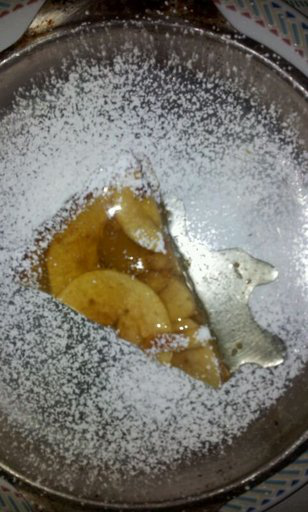

In [95]:
PIL.Image.open(str(Apple_pie[0]))

In [96]:
class_list = "DL-datasets/food-101/meta/labels.txt"

In [97]:
class_file = open(class_list)

In [98]:
classes = class_file.read()
class_file.close()

In [99]:
list1 = classes.split('\n')

In [100]:
list1

['Apple pie',
 'Baby back ribs',
 'Baklava',
 'Beef carpaccio',
 'Beef tartare',
 'Beet salad',
 'Beignets',
 'Bibimbap',
 'Bread pudding',
 'Breakfast burrito',
 'Bruschetta',
 'Caesar salad',
 'Cannoli',
 'Caprese salad',
 'Carrot cake',
 'Ceviche',
 'Cheesecake',
 'Cheese plate',
 'Chicken curry',
 'Chicken quesadilla',
 'Chicken wings',
 'Chocolate cake',
 'Chocolate mousse',
 'Churros',
 'Clam chowder',
 'Club sandwich',
 'Crab cakes',
 'Creme brulee',
 'Croque madame',
 'Cup cakes',
 'Deviled eggs',
 'Donuts',
 'Dumplings',
 'Edamame',
 'Eggs benedict',
 'Escargots',
 'Falafel',
 'Filet mignon',
 'Fish and chips',
 'Foie gras',
 'French fries',
 'French onion soup',
 'French toast',
 'Fried calamari',
 'Fried rice',
 'Frozen yogurt',
 'Garlic bread',
 'Gnocchi',
 'Greek salad',
 'Grilled cheese sandwich',
 'Grilled salmon',
 'Guacamole',
 'Gyoza',
 'Hamburger',
 'Hot and sour soup',
 'Hot dog',
 'Huevos rancheros',
 'Hummus',
 'Ice cream',
 'Lasagna',
 'Lobster bisque',
 'Lobster

In [101]:
class_name = []

for i in range(len(list1)):
    
    name=""
    
    for j in range(len(list1[i])):
        
        if(list1[i][j]==' '):
            
            name=name+'_'
            
        else:
            
            name=name+list1[i][j]
            
    name=name.lower()
    class_name.append(name)
        
        

In [102]:
class_name

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [63]:
len(class_name)

102

In [64]:
class_dict = {}

for i in range(len(class_name)-1):
    
    str2=class_name[i]
    str2=str2+'/*'
    list2=list(dataset.glob(str2))
    
    list3 = []
    
    for j in range((len(list2)//50)):
        list3.append(list2[j])
        
    class_dict[class_name[i]]=list3

In [65]:
class_dict

{'apple_pie': [WindowsPath('DL-datasets/food-101/images/apple_pie/1005649.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1011328.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/101251.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1014775.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1026328.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1028787.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1034399.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/103801.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1038694.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1043283.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1047447.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1050519.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1057749.jpg'),
  WindowsPath('DL-datasets/food-101/images/apple_pie/1057810.jpg'),
  WindowsPath('DL-datasets/food-101/i

In [66]:
len(Apple_pie)

1000

In [67]:
len(class_dict['apple_pie'])

20

In [68]:
img = cv2.imread(str(class_dict['apple_pie'][0]))
img.shape

(512, 308, 3)

In [69]:
img = cv2.imread(str(class_dict['apple_pie'][1]))
img.shape

(512, 512, 3)

In [70]:
number_dict = {}

for i in range(len(class_name)-1):
    
    number_dict[class_name[i]]=i
    
number_dict

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheesecake': 16,
 'cheese_plate': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [71]:
# Since dimensions are different so we need to resize 

X = [] # It stores the resized image in matrix format
Y = [] # It stores the number of food type from number dict

for class_name,images in class_dict.items():
    
    for image in images:
        
        img = cv2.imread(str(image))
        
        resized_img = cv2.resize(img,(180,180))
        
        X.append(resized_img)
        Y.append(number_dict[class_name])

In [72]:
X[0]

array([[[47, 56, 55],
        [52, 58, 57],
        [52, 57, 58],
        ...,
        [39, 44, 42],
        [28, 34, 33],
        [38, 44, 44]],

       [[36, 40, 30],
        [38, 42, 32],
        [43, 45, 36],
        ...,
        [32, 38, 35],
        [34, 42, 35],
        [20, 27, 22]],

       [[61, 67, 59],
        [57, 62, 54],
        [56, 60, 53],
        ...,
        [43, 46, 45],
        [45, 50, 48],
        [40, 47, 44]],

       ...,

       [[51, 56, 50],
        [36, 41, 40],
        [28, 37, 40],
        ...,
        [39, 44, 47],
        [39, 44, 47],
        [37, 41, 46]],

       [[43, 60, 55],
        [53, 65, 66],
        [55, 61, 69],
        ...,
        [34, 39, 42],
        [35, 39, 44],
        [35, 39, 44]],

       [[38, 69, 64],
        [46, 65, 68],
        [51, 56, 68],
        ...,
        [34, 39, 42],
        [34, 38, 43],
        [32, 36, 41]]], dtype=uint8)

In [73]:
Y[0]

0

In [74]:
import numpy as np
X = np.array(X)
Y = np.array(Y)

In [75]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=0)

In [76]:
X_train.shape

(1515, 180, 180, 3)

In [77]:
Y_train.shape

(1515,)

In [78]:
X_test.shape

(505, 180, 180, 3)

In [79]:
Y_test.shape

(505,)

In [80]:
X_train = X_train/255
X_test = X_test/255

In [81]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
     layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
     layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(101)
])

In [82]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
48/48 [==============================] - 21s 407ms/step - loss: 4.6208 - accuracy: 0.0086
Epoch 2/10
48/48 [==============================] - 26s 532ms/step - loss: 4.6088 - accuracy: 0.0145
Epoch 3/10
48/48 [==============================] - 24s 497ms/step - loss: 4.5689 - accuracy: 0.0271
Epoch 4/10
48/48 [==============================] - 25s 521ms/step - loss: 4.2100 - accuracy: 0.0878
Epoch 5/10
48/48 [==============================] - 25s 527ms/step - loss: 2.5144 - accuracy: 0.4330
Epoch 6/10
48/48 [==============================] - 25s 514ms/step - loss: 0.7968 - accuracy: 0.8092
Epoch 7/10
48/48 [==============================] - 24s 510ms/step - loss: 0.2101 - accuracy: 0.9551
Epoch 8/10
48/48 [==============================] - 26s 546ms/step - loss: 0.1453 - accuracy: 0.9729
Epoch 9/10
48/48 [==============================] - 25s 514ms/step - loss: 0.0682 - accuracy: 0.9855
Epoch 10/10
48/48 [==============================] - 26s 536ms/step - loss: 0.0365 - accura

In [83]:
#Estimation model's performance

test_loss , test_acc = model.evaluate(X_test,Y_test)
print("Loss = ",test_loss)
print("Accuracy = ",test_acc)

16/16 [==============================] - 2s 91ms/step - loss: 14.3776 - accuracy: 0.0297
Loss =  14.3776216506958
Accuracy =  0.029702970758080482


In [107]:
import random
n = random.randint(0,len(X_test))

In [103]:
class_name

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

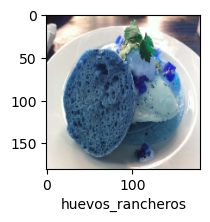

In [104]:
plt.figure(figsize=(15,2))
plt.imshow(X_test[n])
plt.xlabel(class_name[Y_test[n]])
plt.show()

In [106]:
predict_model = model.predict(X_test)
print('predicted class ',class_name[np.argmax(predict_model[n])])

16/16 [==============================] - 1s 88ms/step
predicted class  tiramisu
